# Building an ANN with the Iris Dataset
    
    ## Introduction
    Artificial Neural Networks (ANNs) are a cornerstone of modern machine learning. In this lab, you will construct a simple ANN to classify iris plants into one of three species based on the length and width of their sepals and petals. This exercise will help you understand the basics of neural networks, including their architecture, activation functions, and the backpropagation algorithm for training.

    ## Dataset Reference
    The Iris dataset was introduced by the British statistician and biologist Ronald Fisher in 1936. It is widely used as a beginner's dataset for machine learning classification problems. You can access this dataset via the `sklearn.datasets` module.
    

In [85]:
import pandas as pd
import seaborn as sns

## Part 1: Load and Explore the Data
    ### Load the Dataset
    **Hint**: Use `sklearn.datasets.load_iris()` to load the Iris dataset into your environment.

    ### Explore the Data
    **Hint**: Use `pandas` to examine the first few rows of the dataset and `matplotlib` or `seaborn` to visualize the feature distributions.
    

In [86]:
df = sns.load_dataset('iris')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [87]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Part 2: Prepare the Data
    ### Split the Data into Training and Test Sets
    **Hint**: Use `train_test_split` from `sklearn.model_selection` to divide the data into training and test sets.

    ### Scale the Features
    **Hint**: Standardize the features using `StandardScaler` from `sklearn.preprocessing`.
    

In [88]:
from sklearn.model_selection import train_test_split

x_train_val, x_test, y_train_val, y_test = train_test_split(df.drop('species', axis=1), df['species'], test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, random_state=42)

In [89]:
from sklearn.preprocessing import StandardScaler , LabelEncoder, MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

enc =  LabelEncoder()
y_train = enc.fit_transform(y_train)
y_val = enc.transform(y_val)
y_test = enc.transform(y_test)

<Axes: xlabel='species'>

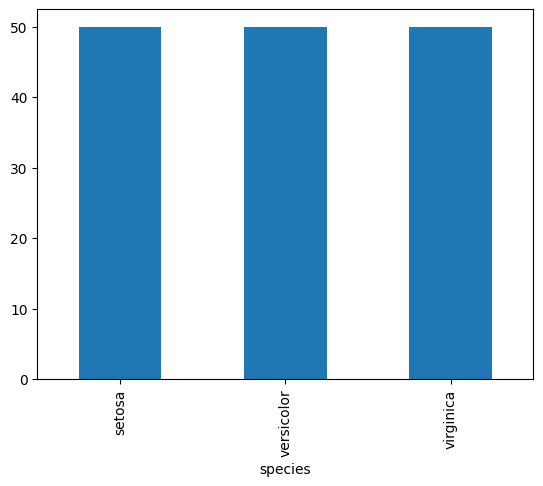

In [90]:
df['species'].value_counts().plot(kind='bar')

## Part 3: Build the ANN Model
    ### Define the Model
    **Hint**: Use `keras` to define a sequential model. Start with a single hidden layer with a ReLU activation function.

    ### Compile the Model
    **Hint**: Compile your model specifying an optimizer and loss function appropriate for classification.
    

In [91]:
df['species'].value_counts() #balanced distributed we use accuarcy

,count
species,
setosa,50
versicolor,50
virginica,50


In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import keras

model = Sequential([
    Dense(units=10, activation='relu', input_shape=(4,)),  #hidden layer ->relu because of non-linearity
    Dense(units=3, activation='softmax') #output layer ->softmax because of multi-classes
])
earlyp_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

opt=  keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer= opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Part 4: Train the Model
    ### Train the Model
    **Hint**: Fit the model on your training data with a reasonable number of epochs.

    ### Evaluate the Model
    **Hint**: Use the test data to evaluate your model and report the accuracy.
    

In [93]:
history = model.fit(x_train, y_train, epochs=200, validation_data=(x_val, y_val))

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.2852 - loss: 1.1342 - val_accuracy: 0.4583 - val_loss: 1.1003
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5859 - loss: 1.0368 - val_accuracy: 0.5000 - val_loss: 1.0517
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6836 - loss: 0.9802 - val_accuracy: 0.5000 - val_loss: 1.0015
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7031 - loss: 0.9138 - val_accuracy: 0.5000 - val_loss: 0.9556
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6797 - loss: 0.8734 - val_accuracy: 0.5417 - val_loss: 0.9038
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7240 - loss: 0.8071 - val_accuracy: 0.5833 - val_loss: 0.8572
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6888 - loss: 0.7756 - val_accuracy: 0.6250 - val_loss: 0.8099
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7474 - loss: 0.7155 - val_accuracy: 0.5833 - val_loss:

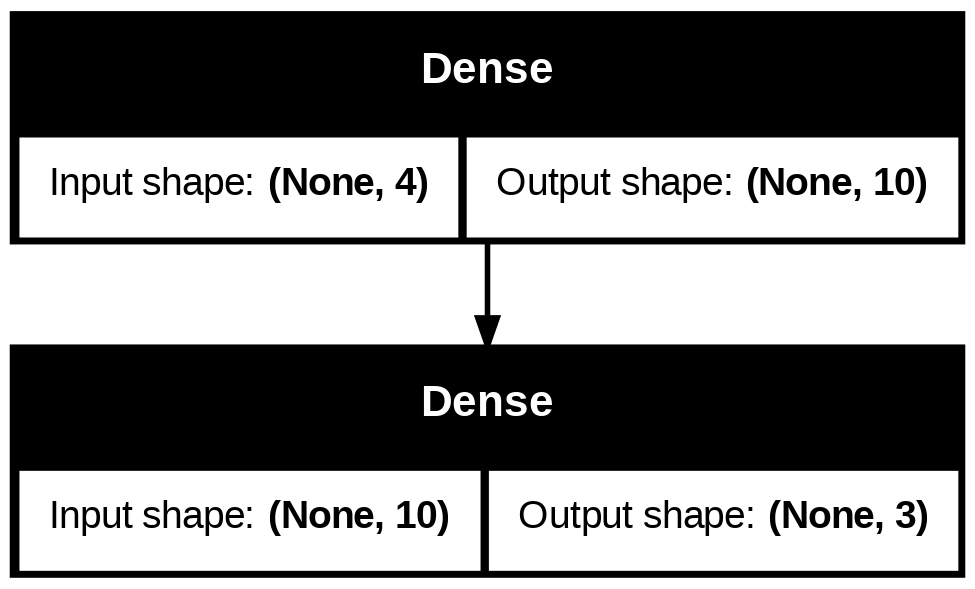

In [104]:
keras.utils.plot_model(model, show_shapes=True)

<Axes: >

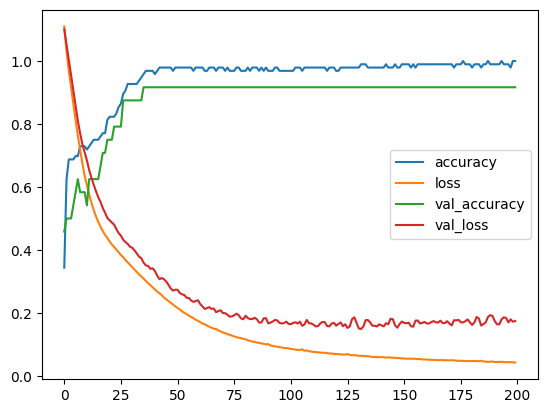

In [94]:
pd.DataFrame(history.history).plot()

In [95]:
model.evaluate(x_val, y_val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9167 - loss: 0.1741


[0.17414593696594238, 0.9166666865348816]

In [96]:
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

In [97]:
y_pred_val = model.predict(x_val)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [98]:
y_pred_val

array([[6.6000322e-04, 9.8861092e-01, 1.0729126e-02],
       [1.3569843e-03, 8.6317843e-01, 1.3546450e-01],
       [9.9952263e-01, 4.7733463e-04, 8.3495859e-09],
       [9.9590814e-01, 4.0918882e-03, 2.9075606e-08],
       [9.9866152e-01, 1.3384440e-03, 3.1750389e-09],
       [1.2809504e-07, 1.6429707e-04, 9.9983549e-01],
       [2.4108154e-04, 2.1993151e-01, 7.7982736e-01],
       [2.1178521e-05, 6.9443816e-03, 9.9303448e-01],
       [8.7498320e-06, 2.3833055e-03, 9.9760789e-01],
       [3.1433494e-05, 1.7024612e-02, 9.8294389e-01],
       [5.1719474e-04, 9.9256843e-01, 6.9144014e-03],
       [2.2783272e-04, 1.2812704e-01, 8.7164509e-01],
       [3.3679011e-03, 9.8300999e-01, 1.3622145e-02],
       [3.2292600e-03, 9.9494112e-01, 1.8294670e-03],
       [2.3191469e-03, 9.6888489e-01, 2.8796032e-02],
       [8.4736294e-01, 1.5263067e-01, 6.3235175e-06],
       [7.4198251e-05, 5.3430133e-02, 9.4649571e-01],
       [9.9994844e-01, 5.1544550e-05, 2.8778890e-10],
       [1.7279198e-03, 9.979

In [99]:
y_pred_val =  np.argmax(y_pred_val,axis=1)  #since the model predicts probability we'll use np.argmax to choose the highest probablity class
y_pred_val

array([1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1,
       0, 0])

In [100]:
accuracy = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9166666666666666


In [101]:
recall = recall_score(y_val, y_pred_val, average='macro')
print("Validation Recall:", recall)

Validation Recall: 0.9393939393939394


In [102]:
precision = precision_score(y_val, y_pred_val, average='macro')
print("Validation Precision:", precision)

Validation Precision: 0.9047619047619048


In [103]:
f1_score = f1_score(y_val, y_pred_val, average='macro')
print("Validation F1 Score:", f1_score)

Validation F1 Score: 0.9111111111111111


## Part 5: Experiment and Improve
    ### Tune the Model
    **Hint**: Try adding more hidden layers or neurons, or use different activation functions and see if the accuracy improves.

    ### Regularization and Dropout
    **Hint**: Implement dropout or regularization techniques to improve the model's generalization.
    


## Part 4: Model Evaluation
### Evaluate the Model
To effectively evaluate your artificial neural network, consider the following metrics:
- **Accuracy**: This is the fraction of predictions our model got right.
- **Confusion Matrix**: A table used to describe the performance of a classification model on a set of test data for which the true values are known.
- **Precision, Recall, and F1-Score**: These metrics provide more insight into the types of errors made by the classifier.
**Hint**: Use `classification_report` and `confusion_matrix` from `sklearn.metrics` to calculate these metrics.

### Visualize Model Performance
Visualizing the learning curves (loss and accuracy over epochs) can provide insights into the training process, such as whether the model is fitting or overfitting.
**Hint**: Use `matplotlib.pyplot` to plot training and validation loss and accuracy.


## Conclusion
    Summarize what the learner should have gained from this lab, including a better understanding of how ANNs work and how they can be applied to real-world classification problems.
    